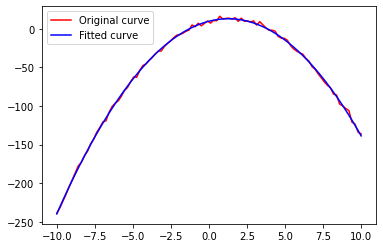

[-1.99087137  5.05462023  9.82832325]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
 
def Fun(p,x):                        # 定义拟合函数形式
    a1,a2,a3 = p
    return a1*x**2+a2*x+a3
    
def error(p,x,y):                    # 拟合残差
    return Fun(p,x)-y 

def main():
    x = np.linspace(-10,10,100)  # 创建时间序列
    p_value = [-2,5,10] # 原始数据的参数
    noise = np.random.randn(len(x))  # 创建随机噪声
    y = Fun(p_value,x)+noise*2 # 加上噪声的序列
    p0 = [0.1,-0.01,100] # 拟合的初始参数设置
    para =leastsq(error, p0, args=(x,y)) # 进行拟合
    y_fitted = Fun(para[0],x) # 画出拟合后的曲线
 
    plt.figure
    plt.plot(x,y,'r', label = 'Original curve')
    plt.plot(x,y_fitted,'-b', label ='Fitted curve')
    plt.legend()
    plt.show()
    print(para[0])
 
if __name__=='__main__':
   main()

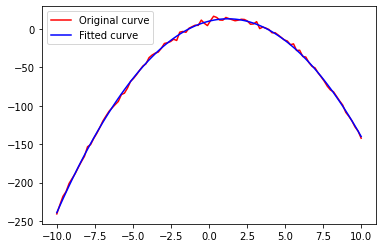

[-1.99731272  4.95686348 10.07331541]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
 
def Fun(x,a1,a2,a3):                   # 定义拟合函数形式
    return a1*x**2+a2*x+a3

def error(p,x,y): # 拟合残差
   return Fun(p,x)-y

def main():
    x = np.linspace(-10,10,100)       # 创建时间序列
    a1,a2,a3 = [-2,5,10]              # 原始数据的参数
    noise = np.random.randn(len(x))   # 创建随机噪声
    y = Fun(x,a1,a2,a3)+noise*2       # 加上噪声的序列
    para, pcov = curve_fit(Fun,x,y)
    y_fitted = Fun(x,para[0],para[1],para[2]) # 画出拟合后的曲线
 
    plt.figure
    plt.plot(x,y,'r', label = 'Original curve')
    plt.plot(x,y_fitted,'-b', label ='Fitted curve')
    plt.legend()
    plt.show()
    print(para)
 
if __name__=='__main__':
   main()

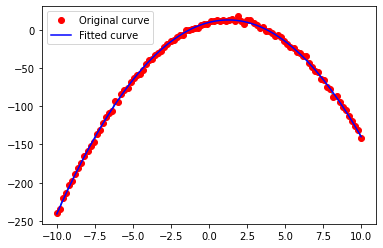

[-1.99998303  5.04758367  9.63180655]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
 
def Fun(x,a1,a2,a3):                   # 定义拟合函数形式
    return a1*x**2+a2*x+a3

def error(p,x,y): # 拟合残差
   return Fun(p,x)-y

def main():
    x = np.linspace(-10,10,100) # 创建时间序列
    a1,a2,a3 = [-2,5,10] # 原始数据的参数
    noise = np.random.randn(len(x)) # 创建随机噪声
    y = Fun(x,a1,a2,a3)+noise*2 # 加上噪声的序列
    plt.plot(x,y)
    para=np.polyfit(x, y, deg = 2)
 
    y_fitted = Fun(x,para[0],para[1],para[2])
    plt.figure
    plt.plot(x,y,'ro', label = 'Original curve')
    plt.plot(x,y_fitted,'-b', label ='Fitted curve')
    plt.legend()
    plt.show()
    print(para)

if __name__=='__main__':
    main() 

In [3]:
###【最小二乘法试验】###
import numpy as np
from scipy.optimize import leastsq

###采样点(Xi,Yi)###
Xi=np.array([8.19,2.72,6.39,8.71,4.7,2.66,3.78])
Yi=np.array([7.01,2.78,6.47,6.71,4.1,4.23,4.05])

"""part 1"""
###需要拟合的函数func及误差error###
def func(p,x):
    k,b=p
    return k*x+b

def error(p,x,y):
    return func(p,x)-y #x、y都是列表，故返回值也是个列表

p0=[1,2]

###最小二乘法求k0、b0###
Para=leastsq(error,p0,args=(Xi,Yi)) #把error函数中除了p以外的参数打包到args中
k0,b0=Para[0]
print("k0=",k0,'\n',"b0=",b0)

"""part 2"""
###定义一个函数，用于计算在k、b已知时，∑((yi-(k*xi+b))**2)###
def S(k,b):
    ErrorArray=np.zeros(k.shape) #k的shape事实上同时也是b的shape
    for x,y in zip(Xi,Yi): #zip(Xi,Yi)=[(8.19,7.01),(2.72,2.78),...,(3.78,4.05)]
        ErrorArray+=(y-(k*x+b))**2
    return ErrorArray

###绘制ErrorArray+最低点###
from enthought.mayavi import mlab
# from mayavi import mlab

#画整个Error曲面
k,b=np.mgrid[k0-1:k0+1:10j,b0-1:b0+1:10j]
Err=S(k,b)
face=mlab.surf(k,b,Err/500.0,warp_scale=1)
mlab.axes(xlabel='k',ylabel='b',zlabel='Error')
mlab.outline(face)

#画最低点（即k，b所在处）
MinErr=S(k0,b0)
mlab.points3d(k0,b0,MinErr/500.0,scale_factor=0.1,color=(0.5,0.5,0.5)) #scale_factor用来指定点的大小
mlab.show()

k0= 0.6134953470024274 
 b0= 1.7940925524616382


ModuleNotFoundError: No module named 'mayavi'